Комментарии читать с веху вниз.
В начале идет описание работы кода затем сам код. 

Импортируем библиотеку Pandas 
загружаем наш DataFrame, устанавливаем разделитель sep=";"

In [23]:
import pandas as pd

df = pd.read_csv('data/dataPr.csv', sep=";")


Тут мы преобразуем столбец 'Дата создания' с помощью метода (to_datetime) и добавляем format='%d.%m.%Y %H:%M' указывая как интерпретировать строки в столбце. 
Если не указать дату с помощью format='%d.%m.%Y %H:%M' появляется ошибка которая нам это сообщает.
ValueError: time data "14.01.2019 10:51" doesn't match format "%m.%d.%Y %H:%M", at position 7. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO 8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `day first` alongside this.

In [24]:
df['Дата создания'] = pd.to_datetime(df['Дата создания'], format='%d.%m.%Y %H:%M')


Тут добавляем два новых столбца, 'Date' / 'Hour'.

In [25]:
df['Date'] = df['Дата создания'].dt.date
df['Hour'] = df['Дата создания'].dt.hour


Строем сводную таблицу, которая будет содержать количество личных дел для каждого часа все даты. 

In [26]:
pivot_table = df.pivot_table(index='Hour', columns='Date', values='ЛД', aggfunc='count')
# pivot_table

С помощью библиотек seaborn и matplotlib.pyplot мы строим график heatmap.
plt.figure(figsize=(30, 10)) тут мы задаем размер нашего полотна отображения графика 
sns.heatmap(pivot_table, cmap='viridis', annot=True, fmt='g', linewidths=.5) тут мы строем сам график
pivot_table тут мы в качестве парметра передаем нашу сводную таблицу 
cmap='viridis' Устанавливаем тепловую карту, также есть 'plasma', 'inferno', 'magma', 'cividis' и др.
annot=True таким образом мы устанавливаем анотации числа в наши ячейки, чтоб орентироваться не только по цвету но и понимать сколько человек обратилось так мы можем увидеть, что в 07.05.2019 в 11 часов было обращений, 201 что является максимальной нагрузкой на приемную комиссию. 
fmt='g' устанавливаем общее значеие для отображения анатации 
linewidths=.5 Устанавливает толщину линий-разделителей между ячейками тепловой карты.
plt.title('Количество личных дел по часам и дням') Устанавливает заголовок графика
plt.show(): Показывает график
Источники:
1 -  https://matplotlib.org/stable/users/explain/colors/colormaps.html
2 - https://seaborn.pydata.org/generated/seaborn.heatmap.html 

Вывод: 
Самая большая нагрузка на приемную комиссию в июне июле. 
Период времени с 9:00 до 15:00
Также небольшой всплеск обращений можно заметить в сентябре. 

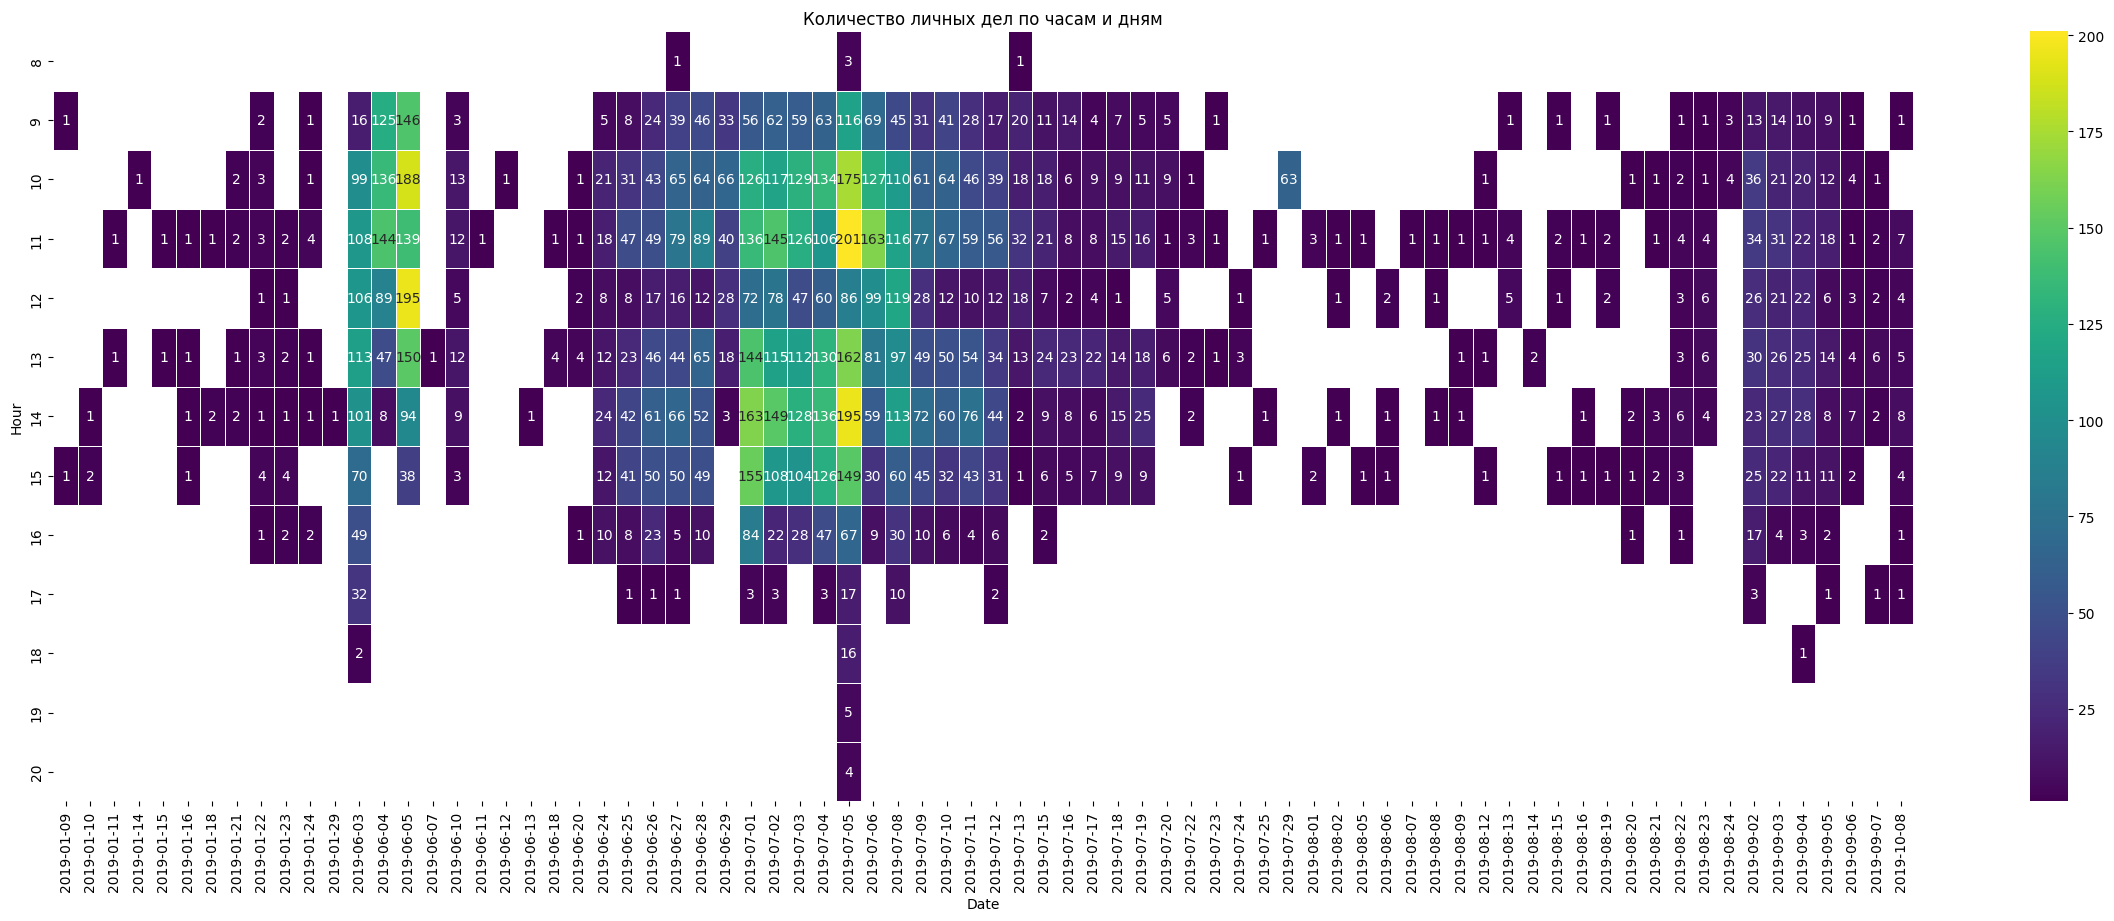

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 10))
sns.heatmap(pivot_table, cmap='viridis', annot=True, fmt='g', linewidths=.5)
plt.title('Количество личных дел по часам и дням')
plt.show()
